Generatate Zipf distributed data according to https://arxiv.org/abs/1310.0448

Zipf's law and criticality in multivariate data without fine-tuning
David J. Schwab, Ilya Nemenman, Pankaj Mehta

In [1]:
%pylab inline
style.use('ggplot')
from numba import jit, vectorize, float64, int32
from numpy.core import multiarray as ma

Populating the interactive namespace from numpy and matplotlib


In [2]:
N = 20
n = 2**(N+2)
b = rand(N)

In [3]:
@jit(nopython=True)
def pack(xs):
    r = 0
    for x in xs:
        r <<= 1
        r |= x
    return r

In [4]:
@vectorize([int32(float64)])
def ff(x):
    xx=b*x
    p = exp(xx)/(2*cosh(xx))
    return pack(rand(N) < p)

In [5]:
%time d = bincount(ff(randn(n)*2))

CPU times: user 53.1 s, sys: 173 ms, total: 53.2 s
Wall time: 53.8 s


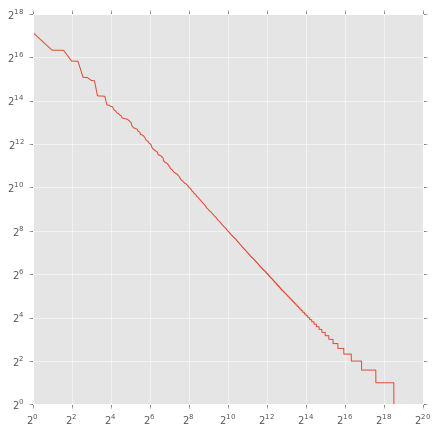

In [6]:
figure(figsize=(7,7))
loglog(sorted(d, reverse=True),basex=2,basey=2)